In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import plotly.express as px
from nltk.corpus import stopwords
from collections import defaultdict
import re
from collections import Counter
from wordcloud import WordCloud 
from sklearn.naive_bayes import MultinomialNB
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
import tensorflow as tf
import numpy as np
from keras import layers, models
import string
import warnings
import time
#warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.datasets import load_wine
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m_shanmugavel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\m_shanmugavel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m_shanmugavel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### The financial news dataset consists of 4840 sentences from English language financial news categorised by sentiment. The dataset was evaluated by 16 annotators who are experts in financial services. The datasets was then divided as following and offered as 4 different subsets. 
- Number of instances with >=50% annotator agreement
- Number of instances with >=66% annotator agreement
- Number of instances with >=75% annotator agreement
- Number of instances with 100% annotator agreement

In [55]:
# Dataframe with number of instances >=50% annotator agreement
df_50 = pd.read_csv('Sentences_50Agree.txt', delimiter='.@', encoding='ISO-8859-1', engine='python', header=None)

In [56]:
df_50

0         1
0     According to Gran , the company has no plans t...   neutral
1     Technopolis plans to develop in stages an area...   neutral
2     The international electronic industry company ...  negative
3     With the new production plant the company woul...  positive
4     According to the company 's updated strategy f...  positive
...                                                 ...       ...
4841  LONDON MarketWatch -- Share prices ended lower...  negative
4842  Rinkuskiai 's beer sales fell by 6.5 per cent ...   neutral
4843  Operating profit fell to EUR 35.4 mn from EUR ...  negative
4844  Net sales of the Paper segment decreased to EU...  negative
4845  Sales in Finland decreased by 10.5 % in Januar...  negative

[4846 rows x 2 columns]

In [57]:
# Dataframe with number of instances >=66% annotator agreement
df_66 = pd.read_csv('Sentences_66Agree.txt', delimiter='.@', encoding='ISO-8859-1', engine='python', header=None)

In [58]:
df_66

0         1
0     According to Gran , the company has no plans t...   neutral
1     Technopolis plans to develop in stages an area...   neutral
2     With the new production plant the company woul...  positive
3     According to the company 's updated strategy f...  positive
4     For the last quarter of 2010 , Componenta 's n...  positive
...                                                 ...       ...
4212  HELSINKI Thomson Financial - Shares in Cargote...  negative
4213  LONDON MarketWatch -- Share prices ended lower...  negative
4214  Rinkuskiai 's beer sales fell by 6.5 per cent ...   neutral
4215  Operating profit fell to EUR 35.4 mn from EUR ...  negative
4216  Sales in Finland decreased by 10.5 % in Januar...  negative

[4217 rows x 2 columns]

In [59]:
# Dataframe with number of instances >=75% annotator agreement
df_75 = pd.read_csv('Sentences_75Agree.txt', delimiter='.@', encoding='ISO-8859-1', engine='python', header=None)

In [60]:
df_75

0         1
0     According to Gran , the company has no plans t...   neutral
1     With the new production plant the company woul...  positive
2     For the last quarter of 2010 , Componenta 's n...  positive
3     In the third quarter of 2010 , net sales incre...  positive
4     Operating profit rose to EUR 13.1 mn from EUR ...  positive
...                                                 ...       ...
3448  Operating result for the 12-month period decre...  negative
3449  HELSINKI Thomson Financial - Shares in Cargote...  negative
3450  LONDON MarketWatch -- Share prices ended lower...  negative
3451  Operating profit fell to EUR 35.4 mn from EUR ...  negative
3452  Sales in Finland decreased by 10.5 % in Januar...  negative

[3453 rows x 2 columns]

In [280]:
# Dataframe with 100% annotator agreement. Decided to use this dataframe to build the model
colnames=['text', 'sentiment'] 
df_all = pd.read_csv('Sentences_AllAgree.txt', delimiter='.@', encoding='ISO-8859-1', engine='python', names=colnames, header=None)

In [281]:
df_all

text sentiment
0     According to Gran , the company has no plans t...   neutral
1     For the last quarter of 2010 , Componenta 's n...  positive
2     In the third quarter of 2010 , net sales incre...  positive
3     Operating profit rose to EUR 13.1 mn from EUR ...  positive
4     Operating profit totalled EUR 21.1 mn , up fro...  positive
...                                                 ...       ...
2259  Operating result for the 12-month period decre...  negative
2260  HELSINKI Thomson Financial - Shares in Cargote...  negative
2261  LONDON MarketWatch -- Share prices ended lower...  negative
2262  Operating profit fell to EUR 35.4 mn from EUR ...  negative
2263  Sales in Finland decreased by 10.5 % in Januar...  negative

[2264 rows x 2 columns]

In [63]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2264 non-null   object
 1   sentiment  2264 non-null   object
dtypes: object(2)
memory usage: 35.5+ KB


In [64]:
df_all['sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [65]:
#No missing values
df_all.isnull().sum()

text         0
sentiment    0
dtype: int64

In [66]:
df_all['sentiment'].value_counts()

sentiment
neutral     1391
positive     570
negative     303
Name: count, dtype: int64

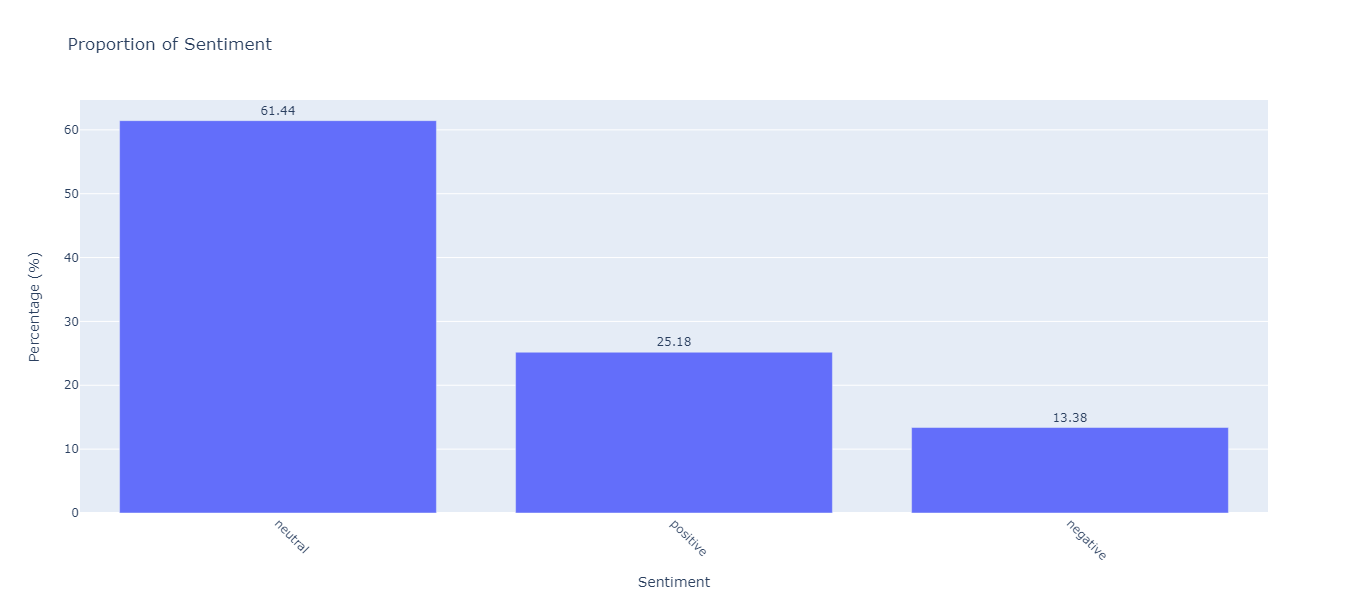

In [67]:
#Proportion of sentiments 
y_counts = df_all['sentiment'].value_counts(normalize=True) * 100

fig = px.bar(x=y_counts.index, y=y_counts.values,
             labels={'x': 'Sentiment', 'y': 'Percentage (%)'},
             title='Proportion of Sentiment',
             text=y_counts.values)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis=dict(tickangle=45), height=600, width=600)
fig.show()


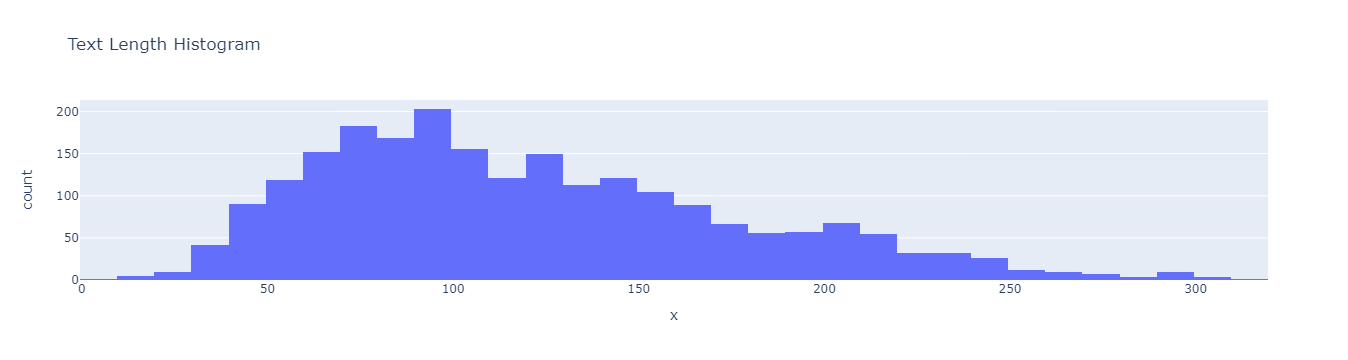

In [68]:
#length of each news.There were more news with length around 90 to 99 characters and in general between 40 and 250 characters
fig = px.histogram(df_all, x=df_all['text'].str.len(), title="Text Length Histogram")
fig.show()

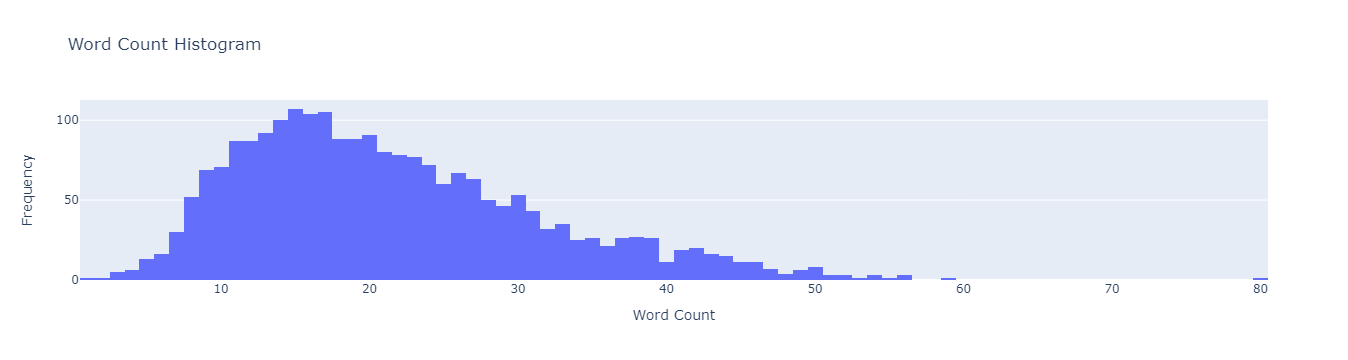

In [69]:
#follolwing histogram shows the frequency of words in the news.The number of words seems to vary from 5 to 50
word_counts = df_all['text'].str.split().map(lambda x: len(x))

fig = px.histogram(x=word_counts, title="Word Count Histogram")
fig.update_layout(xaxis_title="Word Count", yaxis_title="Frequency")
fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m_shanmugavel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


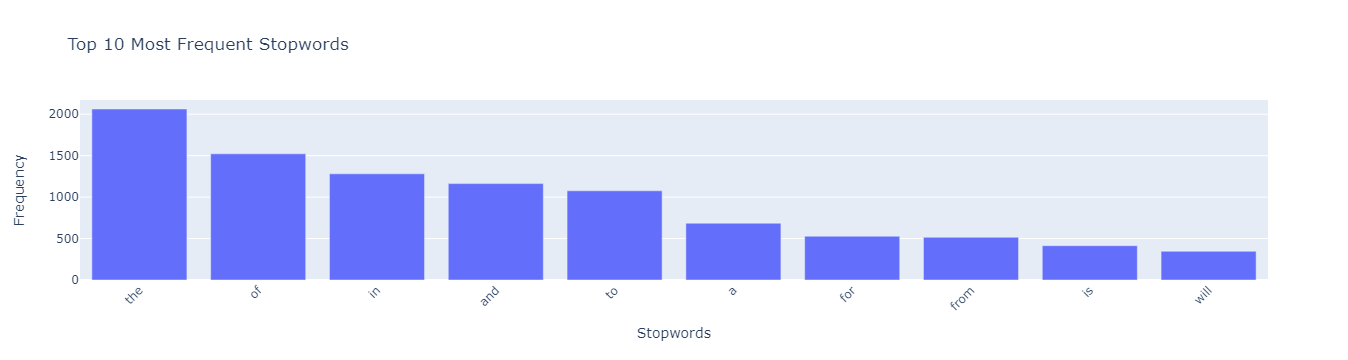

In [70]:
#plot to visualize most used stop words in the news
nltk.download('stopwords')
stop = set(stopwords.words('english'))
corpus = []
new = df_all['text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top_stopwords = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
x, y = zip(*top_stopwords)

fig = px.bar(x=x, y=y, labels={'x': 'Stopwords', 'y': 'Frequency'}, title='Top 10 Most Frequent Stopwords')
fig.update_layout(xaxis_tickangle=-45, width=800)
fig.show()


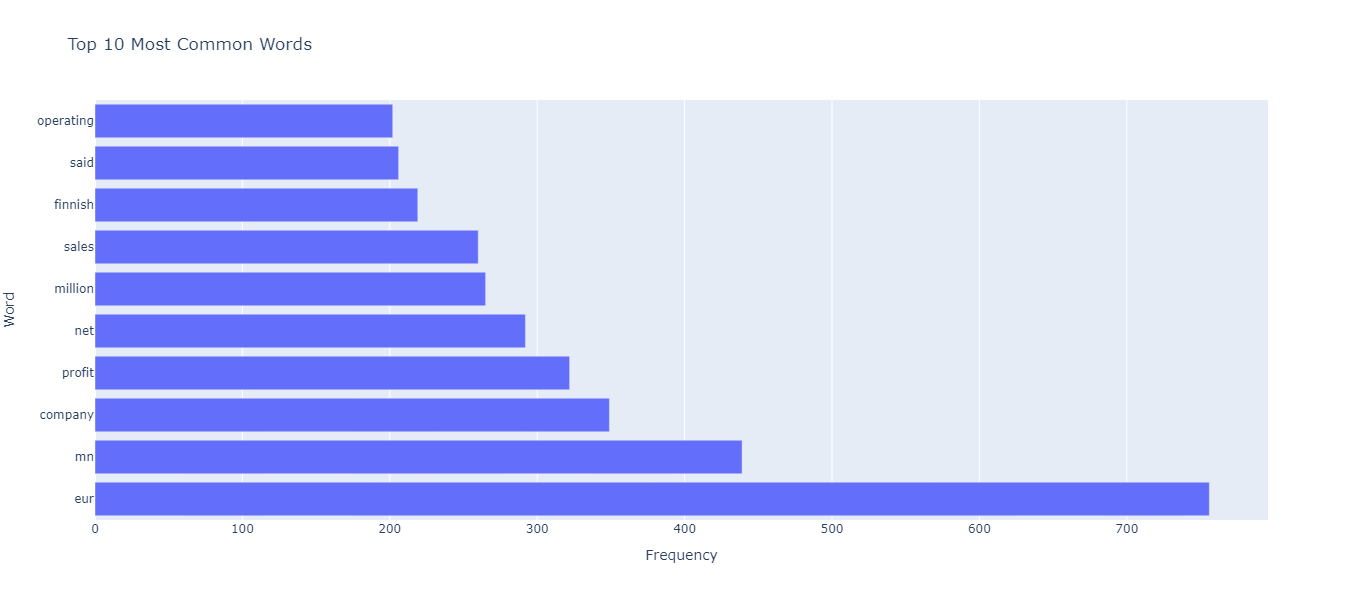

In [71]:
#The plot above showed the frequently used stop words. Following plot shows frequently used non-stop words
counter = Counter()
for word in corpus:
    # Removing special characters and stop words
    word = re.sub(r'[^a-zA-Z0-9\s]', '', word)
    if word.lower() not in stop and word != '':
        counter[word.lower()] += 1

most_common = counter.most_common()

x, y = zip(*most_common[:10])

fig = px.bar(x=y, y=x, orientation='h', 
             labels={'x': 'Frequency', 'y': 'Word'},
             title='Top 10 Most Common Words')
fig.update_layout(height=600, width=800)
fig.show()


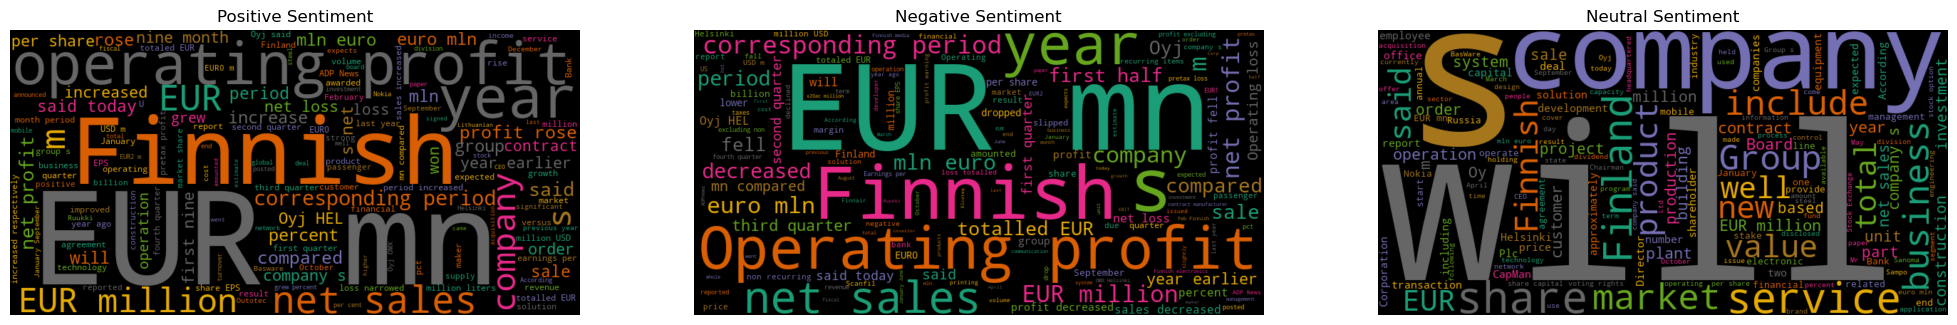

In [72]:
#Created words for each sentiment.We can notice words like "net profit" , "increased" in the positive sentiment and words like "net loss" and "decreased" in negative sentiment. 
#The word "Finnish" appear in all sentiments which makes me think most of these news are from Finland
positive_news = ' '.join(df_all[df_all['sentiment'] == 'positive']['text'])
negative_news = ' '.join(df_all[df_all['sentiment'] == 'negative']['text'])
neutral_news = ' '.join(df_all[df_all['sentiment'] == 'neutral']['text'])

#WordCloud for each sentiment
wordcloud_positive = WordCloud(width=800, height=400, max_words=150,colormap="Dark2").generate(positive_news)
wordcloud_negative = WordCloud(width=800, height=400, max_words=150,colormap="Dark2").generate(negative_news)
wordcloud_neutral = WordCloud(width=800, height=400, max_words=150,colormap="Dark2").generate(neutral_news)


plt.figure(figsize=(25, 15))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.show()

In [73]:
X = df_all.drop('sentiment', axis = 1)
y = df_all['sentiment']

In [74]:
X

text
0     According to Gran , the company has no plans t...
1     For the last quarter of 2010 , Componenta 's n...
2     In the third quarter of 2010 , net sales incre...
3     Operating profit rose to EUR 13.1 mn from EUR ...
4     Operating profit totalled EUR 21.1 mn , up fro...
...                                                 ...
2259  Operating result for the 12-month period decre...
2260  HELSINKI Thomson Financial - Shares in Cargote...
2261  LONDON MarketWatch -- Share prices ended lower...
2262  Operating profit fell to EUR 35.4 mn from EUR ...
2263  Sales in Finland decreased by 10.5 % in Januar...

[2264 rows x 1 columns]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X['text'], y, random_state = 42)

In [76]:
X_train.head()

705     The prerequisite for inclusion in the program ...
1146    A total 30 % of the order value was booked in ...
581     Panostaja , headquartered in Tampere , Finland...
429     Finnish consulting and engineering group Poyry...
891     The company is listed on the Nordic Exchange i...
Name: text, dtype: object

In [77]:
#Used stemmer to process the text to it root form
def stemmer(text):
    stem = PorterStemmer()
    return ' '.join([stem.stem(w) for w in word_tokenize(text)])

In [78]:
stemmed_content = df_all['text'].apply(stemmer)
print(type(stemmed_content))
print(stemmed_content.head())

<class 'pandas.core.series.Series'>
0    accord to gran , the compani ha no plan to mov...
1    for the last quarter of 2010 , componenta 's n...
2    in the third quarter of 2010 , net sale increa...
3    oper profit rose to eur 13.1 mn from eur 8.7 m...
4    oper profit total eur 21.1 mn , up from eur 18...
Name: text, dtype: object


In [79]:
#Used lemmatization which stems the words based on context
def lemmatizer(text):
    lemma = WordNetLemmatizer()
    return ' '.join([lemma.lemmatize(w) for w in word_tokenize(text)])

In [80]:
lemmatized_content = df_all['text'].apply(lemmatizer)

print(type(lemmatized_content))
print(lemmatized_content.head())

<class 'pandas.core.series.Series'>
0    According to Gran , the company ha no plan to ...
1    For the last quarter of 2010 , Componenta 's n...
2    In the third quarter of 2010 , net sale increa...
3    Operating profit rose to EUR 13.1 mn from EUR ...
4    Operating profit totalled EUR 21.1 mn , up fro...
Name: text, dtype: object


In [81]:
lemmatized_content.head()

0    According to Gran , the company ha no plan to ...
1    For the last quarter of 2010 , Componenta 's n...
2    In the third quarter of 2010 , net sale increa...
3    Operating profit rose to EUR 13.1 mn from EUR ...
4    Operating profit totalled EUR 21.1 mn , up fro...
Name: text, dtype: object

In [82]:
#Decided to use the lemmatized content to build the model since we are dealing with financial news
X_train, X_test, y_train, y_test = train_test_split(lemmatized_content, y, random_state = 42)

In [83]:
X_train

705     The prerequisite for inclusion in the program ...
1146    A total 30 % of the order value wa booked in t...
581     Panostaja , headquartered in Tampere , Finland...
429     Finnish consulting and engineering group Poyry...
891     The company is listed on the Nordic Exchange i...
                              ...                        
1638    For 2009 , net profit wa EUR3m and the company...
1095      The new SEPA cad will replace Finnish bank card
1130    ` Nordic infrastructure construction is one of...
1294    Market data and analytics are derived from pri...
860     Cargotec Corporation , Press Release , August ...
Name: text, Length: 1698, dtype: object

In [84]:
y_train

705      neutral
1146     neutral
581      neutral
429     positive
891      neutral
          ...   
1638     neutral
1095     neutral
1130     neutral
1294     neutral
860     positive
Name: sentiment, Length: 1698, dtype: object

In [85]:
#using count vectorizer to convert the text date into a sparse matrix
cvect = CountVectorizer(stop_words = 'english', max_features = 300)
X_train_vect = cvect.fit_transform(X_train)
X_test_vect = cvect.transform(X_test)

In [86]:
X_train_vect

<1698x300 sparse matrix of type '<class 'numpy.int64'>'
	with 10176 stored elements in Compressed Sparse Row format>

In [87]:
#pipeline to build a logistic regression model
lgr_count = Pipeline([('cvect', CountVectorizer(stop_words = 'english')),
                       ('lgr', LogisticRegression(max_iter=1000))])
lgr_count.fit(X_train, y_train)
lgr_count_acc = lgr_count.score(X_test, y_test)

In [88]:
params = {'cvect__max_features': [100, 500, 1000, 2000],
         'cvect__stop_words': ['english', None]}

In [89]:
import time
start_time = time.time()
lgr_count_grid = GridSearchCV(lgr_count, param_grid=params)
lgr_count_grid.fit(X_train, y_train)
end_time = time.time()
time_lgr_count = (end_time - start_time)
lgr_count_grid_acc = lgr_count_grid.score(X_test, y_test)
lgr_count_param = lgr_count_grid.best_params_['cvect__max_features']

In [90]:
#time taken to fit the model
time_lgr_count

11.932962417602539

In [91]:
#Accuracy of the model
lgr_count_grid_acc

0.8833922261484098

In [92]:
#Best max features
lgr_count_param

2000

In [93]:
#Build a logistic regression model using Tfid Vectorizer instead of Count Vectorized and compared the results
lgr_tfidf = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english')),
                       ('lgr', LogisticRegression(max_iter=1000))])
lgr_tfidf.fit(X_train, y_train)
lgr_tfidf_acc = lgr_tfidf.score(X_test, y_test)

In [94]:
params = {'tfidf__max_features': [100, 500, 1000, 2000],
         'tfidf__stop_words': ['english', None]}

In [95]:
start_time = time.time()
lgr_tfidf_grid = GridSearchCV(lgr_tfidf, param_grid=params)
lgr_tfidf_grid.fit(X_train, y_train)
end_time = time.time()
time_lgr_tfidf = (end_time - start_time)
lgr_tfidf_grid_acc = lgr_tfidf_grid.score(X_test, y_test)
lgr_tfidf_param = lgr_tfidf_grid.best_params_['tfidf__max_features']

In [96]:
time_lgr_tfidf

10.602308988571167

In [97]:
lgr_tfidf_grid_acc

0.8568904593639576

In [98]:
lgr_tfidf_param

500

In [99]:
de_count = Pipeline([('cvect', CountVectorizer(stop_words = 'english')),
                       ('de', DecisionTreeClassifier())])
de_count.fit(X_train, y_train)
de_countt_acc = de_count.score(X_test, y_test)

In [100]:
params = {'cvect__max_features': [100, 500, 1000, 2000],
         'cvect__stop_words': ['english', None]}

In [101]:
start_time = time.time()
dt_count_grid = GridSearchCV(de_count, param_grid=params)
dt_count_grid.fit(X_train, y_train)
end_time = time.time()
time_dt_count = (end_time - start_time)
dt_count_grid_acc = dt_count_grid.score(X_test, y_test)
dt_count_param = dt_count_grid.best_params_['cvect__max_features']

In [102]:
dt_tfidf = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english')),
                       ('dt', DecisionTreeClassifier())])
dt_tfidf.fit(X_train, y_train)
dt_tfidf_acc = lgr_tfidf.score(X_test, y_test)

In [103]:
params = {'tfidf__max_features': [100, 500, 1000, 2000],
         'tfidf__stop_words': ['english', None]}

In [104]:
start_time = time.time()
dt_tfidf_grid = GridSearchCV(dt_tfidf, param_grid=params)
dt_tfidf_grid.fit(X_train, y_train)
end_time = time.time()
time_dt_tfidf = (end_time - start_time)
dt_tfidf_grid_acc = dt_tfidf_grid.score(X_test, y_test)
dt_tfidf_param = dt_tfidf_grid.best_params_['tfidf__max_features']

In [105]:
bay_count = Pipeline([('cvect', CountVectorizer(stop_words = 'english')),
                       ('bayes', MultinomialNB())])
bay_count.fit(X_train, y_train)
bay_count_acc = bay_count.score(X_test, y_test)
params = {'cvect__max_features': [100, 500, 1000, 2000],
         'cvect__stop_words': ['english', None]}
start_time = time.time()
bay_count_grid = GridSearchCV(bay_count, param_grid=params)
bay_count_grid.fit(X_train, y_train)
end_time = time.time()
time_bay_count = (end_time - start_time)
bay_count_grid_acc = bay_count_grid.score(X_test, y_test)
bay_count_grid_param = bay_count_grid.best_params_['cvect__max_features']

In [106]:
bay_tfidf = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english')),
                       ('bayes', MultinomialNB())])
bay_tfidf.fit(X_train, y_train)
bay_tfidf_acc = bay_tfidf.score(X_test, y_test)
params = {'tfidf__max_features': [100, 500, 1000, 2000],
         'tfidf__stop_words': ['english', None]}
start_time = time.time()
bay_tfidf_grid = GridSearchCV(bay_tfidf, param_grid=params)
bay_tfidf_grid.fit(X_train, y_train)
end_time = time.time()
time_bay_tfidf = (end_time - start_time)
bay_tfidf_grid_acc = bay_tfidf_grid.score(X_test, y_test)
bay_tfidf_grid_param = bay_tfidf_grid.best_params_['tfidf__max_features']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(stemmed_content, y, random_state = 42)

In [108]:
lgr_count_stem = Pipeline([('cvect', CountVectorizer(stop_words = 'english')),
                       ('lgr', LogisticRegression(max_iter=1000))])
lgr_count_stem.fit(X_train, y_train)
lgr_count_stem_acc = lgr_count_stem.score(X_test, y_test)

In [109]:
params = {'cvect__max_features': [100, 500, 1000, 2000],
         'cvect__stop_words': ['english', None]}
start_time = time.time()
lgr_count_stem_grid = GridSearchCV(lgr_count_stem, param_grid=params)
lgr_count_stem_grid.fit(X_train, y_train)
end_time = time.time()
time_lgr_count_stem = (end_time - start_time)
lgr_count_stem_grid_acc = lgr_count_stem_grid.score(X_test, y_test)
lgr_count_stem_grid_param = lgr_count_stem_grid.best_params_['cvect__max_features']

In [110]:
lgr_stem_tfidf = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english')),
                       ('lgr', LogisticRegression(max_iter=1000))])
lgr_stem_tfidf.fit(X_train, y_train)
lgr_stem_tfidf_acc = lgr_stem_tfidf.score(X_test, y_test)
params = {'tfidf__max_features': [100, 500, 1000, 2000],
         'tfidf__stop_words': ['english', None]}
start_time = time.time()
lgr_stem_tfidf_grid = GridSearchCV(lgr_stem_tfidf, param_grid=params)
lgr_stem_tfidf_grid.fit(X_train, y_train)
end_time = time.time()
time_lgr_stem_tfidf = (end_time - start_time)
lgr_stem_tfidf_grid_acc = lgr_stem_tfidf_grid.score(X_test, y_test)
lgr_stem_tfidf_grid_param = lgr_stem_tfidf_grid.best_params_['tfidf__max_features']

In [111]:
dt_stem_count = Pipeline([('cvect', CountVectorizer(stop_words = 'english')),
                       ('de', DecisionTreeClassifier())])
dt_stem_count.fit(X_train, y_train)
dt_stem_count_acc = dt_stem_count.score(X_test, y_test)
params = {'cvect__max_features': [100, 500, 1000, 2000],
         'cvect__stop_words': ['english', None]}
start_time = time.time()
dt_stem_count_grid = GridSearchCV(dt_stem_count, param_grid=params)
dt_stem_count_grid.fit(X_train, y_train)
end_time = time.time()
time_dt_count_stem = (end_time - start_time)
dt_stem_count_grid_acc = dt_stem_count_grid.score(X_test, y_test)
dt_stem_count_grid_param = dt_stem_count_grid.best_params_['cvect__max_features']

In [112]:
dt_stem_tfidf = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english')),
                       ('dt', DecisionTreeClassifier())])
dt_stem_tfidf.fit(X_train, y_train)
dt_stem_tfidf_acc = dt_stem_tfidf.score(X_test, y_test)
params = {'tfidf__max_features': [100, 500, 1000, 2000],
         'tfidf__stop_words': ['english', None]}
start_time = time.time()
dt_stem_tfidf_grid = GridSearchCV(dt_stem_tfidf, param_grid=params)
dt_stem_tfidf_grid.fit(X_train, y_train)
end_time = time.time()
time_dt_tfidf_stem = (end_time - start_time)
dt_stem_tfidf_grid_acc = dt_stem_tfidf_grid.score(X_test, y_test)
dt_stem_tfidf_grid_param = dt_stem_tfidf_grid.best_params_['tfidf__max_features']

In [113]:
bay_stem_count = Pipeline([('cvect', CountVectorizer(stop_words = 'english')),
                       ('bayes', MultinomialNB())])
bay_stem_count.fit(X_train, y_train)
bay_stem_count_acc = bay_stem_count.score(X_test, y_test)
params = {'cvect__max_features': [100, 500, 1000, 2000],
         'cvect__stop_words': ['english', None]}
start_time = time.time()
bay_stem_count_grid = GridSearchCV(bay_stem_count, param_grid=params)
bay_stem_count_grid.fit(X_train, y_train)
end_time = time.time()
time_bay_count_stem = (end_time - start_time)
bay_stem_count_grid_acc = bay_stem_count_grid.score(X_test, y_test)
bay_stem_count_grid_param = bay_stem_count_grid.best_params_['cvect__max_features']

In [114]:
bay_tfidf_stem = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english')),
                       ('bayes', MultinomialNB())])
bay_tfidf_stem.fit(X_train, y_train)
bay_tfidf_stem_acc = bay_tfidf_stem.score(X_test, y_test)
params = {'tfidf__max_features': [100, 500, 1000, 2000],
         'tfidf__stop_words': ['english', None]}
start_time = time.time()
bay_tfidf_stem_grid = GridSearchCV(bay_tfidf_stem, param_grid=params)
bay_tfidf_stem_grid.fit(X_train, y_train)
end_time = time.time()
time_bay_tfidf_stem = (end_time - start_time)
bay_tfidf_stem_grid_acc = bay_tfidf_stem_grid.score(X_test, y_test)
bay_tfidf_stem_grid_param = bay_tfidf_stem_grid.best_params_['tfidf__max_features']

In [115]:
res_dict = {'model': ['LR-Lemmatized-Count', 'LR-Lemmatized-TFID'],
           'best_params': [lgr_count_param, lgr_tfidf_param],
           'best_score': [lgr_count_grid_acc, lgr_tfidf_grid_acc],
           'fit time': [time_lgr_count, time_lgr_tfidf]}
results_df = pd.DataFrame(res_dict).set_index('model')

In [116]:
res_dict = {'model': ['LR-Stemmed-Count', 'LR-Stemmed-TFID', 'LR-Lemmatized-Count', 'LR-Lemmatized-TFID', 'DT-Stemmed-Count', 'DT-Stemmed-TFID', 
                      'DT-Lemmatized-Count', 'DT-Lemmatized-TFID', 'Bayes-Stemmed-Count', 'Bayes-Stemmed-TFID', 'Bayes-Lemmatized-Count', 'Bayes-Lemmatized-TFID'],
           'best_params': [lgr_count_stem_grid_param, lgr_stem_tfidf_grid_param, lgr_count_param, lgr_tfidf_param, dt_stem_count_grid_param, dt_stem_tfidf_grid_param, dt_count_param, dt_tfidf_param, 
                           bay_stem_count_grid_param, bay_tfidf_stem_grid_param, bay_count_grid_param, bay_tfidf_grid_param],
           'best_score': [lgr_count_stem_grid_acc, lgr_stem_tfidf_grid_acc, lgr_count_grid_acc, lgr_tfidf_grid_acc, dt_stem_count_grid_acc, dt_stem_tfidf_grid_acc, dt_count_grid_acc, bay_stem_count_grid_acc, dt_tfidf_grid_acc,
                          bay_tfidf_stem_grid_acc, bay_count_grid_acc, bay_tfidf_grid_acc],
           'fit time': [time_lgr_count_stem, time_lgr_stem_tfidf, time_lgr_count, time_lgr_tfidf, time_dt_count_stem, time_dt_tfidf_stem, time_dt_count, time_dt_tfidf, 
                        time_bay_count_stem, time_bay_tfidf_stem,time_bay_count,time_bay_tfidf]}
results_df = pd.DataFrame(res_dict).set_index('model')

In [117]:
results_df

best_params  best_score   fit time
model                                                     
LR-Stemmed-Count               2000    0.902827  14.807137
LR-Stemmed-TFID                 500    0.872792  19.473354
LR-Lemmatized-Count            2000    0.883392  11.932962
LR-Lemmatized-TFID              500    0.856890  10.602309
DT-Stemmed-Count               1000    0.840989  23.583094
DT-Stemmed-TFID                2000    0.839223  48.821333
DT-Lemmatized-Count            2000    0.835689  16.191636
DT-Lemmatized-TFID             2000    0.840989  19.623062
Bayes-Stemmed-Count            1000    0.835689   6.000319
Bayes-Stemmed-TFID              500    0.825088   6.083068
Bayes-Lemmatized-Count         2000    0.825088   3.548097
Bayes-Lemmatized-TFID           500    0.810954   5.599316

#### The Logistic regression model with stemmed content and Count Ventorizer has better accuracy than the other models. Bayes models were much faster but their accuracy was low compared to other models.Let us check if a CNN model improves accuracy

In [118]:
df_all

text sentiment
0     According to Gran , the company has no plans t...   neutral
1     For the last quarter of 2010 , Componenta 's n...  positive
2     In the third quarter of 2010 , net sales incre...  positive
3     Operating profit rose to EUR 13.1 mn from EUR ...  positive
4     Operating profit totalled EUR 21.1 mn , up fro...  positive
...                                                 ...       ...
2259  Operating result for the 12-month period decre...  negative
2260  HELSINKI Thomson Financial - Shares in Cargote...  negative
2261  LONDON MarketWatch -- Share prices ended lower...  negative
2262  Operating profit fell to EUR 35.4 mn from EUR ...  negative
2263  Sales in Finland decreased by 10.5 % in Januar...  negative

[2264 rows x 2 columns]

In [282]:
X = df_all.drop('sentiment', axis = 1)
y = df_all['sentiment']

In [283]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2264 non-null   object
 1   sentiment  2264 non-null   object
dtypes: object(2)
memory usage: 35.5+ KB


In [408]:
X = df_all.drop('sentiment', axis = 1)
y = df_all['sentiment']
train_size = 0.8
test_size = 0.10
val_size = 0.10
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X, y, test_size=(1 - train_size), random_state=42)

# Second split: validation and test
X_val, X_test = train_test_split(X_remaining, test_size=(test_size / (test_size + val_size)), random_state=42)
Y_val, Y_test = train_test_split(Y_remaining, test_size=(test_size / (test_size + val_size)), random_state=42)



In [409]:
#Function to remove html tags and punctuation.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    return tf.strings.regex_replace(
        stripped_html, f"[{re.escape(string.punctuation)}]", ""
    )

In [410]:
max_features = 2000
embedding_dim = 128
sequence_length = 50

In [411]:
#Vectorize the data. Reference https://keras.io/examples/nlp/text_classification_from_scratch/
vectorizer = tf.keras.layers.TextVectorization(standardize=custom_standardization,max_tokens=max_features, output_mode='int', output_sequence_length=sequence_length)
vectorizer.adapt(X_train)
train_texts_vectorized = vectorizer(tf.constant(X_train))
val_texts_vectorized = vectorizer(tf.constant(X_val))
test_texts_vectorized = vectorizer(tf.constant(X_test))

In [412]:
#Use label binarizer to encode the target
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(Y_train)
y_val = label_binarizer.transform(Y_val)
y_test = label_binarizer.transform(Y_test)

In [413]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_texts_vectorized, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((val_texts_vectorized, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((test_texts_vectorized, y_test))

In [414]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(50,), dtype=tf.int64, name=None), TensorSpec(shape=(3,), dtype=tf.int32, name=None))>

In [415]:
# Shuffle and batch the datasets
batch_size = 32
train_dataset = train_dataset.shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [423]:
#created a model with Embedding layer,convolution layer, Max pooling layer,Dense layer,drop out layer and the output layer with sigmoid activation function
def create_cnn_model(vocab_size, sequence_length, num_classes, embedding_dim=128, num_filters=256, kernel_size=7, dropout_rate=0.2):
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    model.add(layers.Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [417]:
#Create the model
vocab_size = max_features
sequence_length = sequence_length
num_classes = len(label_binarizer.classes_)
cnn_model = create_cnn_model(vocab_size, sequence_length, num_classes)



In [399]:
# Train the CNN model
start_time = time.time()

epochs = 50
history = cnn_model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)
end_time = time.time()
time_cnn = (end_time - start_time)



Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6160 - loss: 0.9051 - val_accuracy: 0.7788 - val_loss: 0.5574
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8186 - loss: 0.4699 - val_accuracy: 0.8673 - val_loss: 0.3456
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9440 - loss: 0.1712 - val_accuracy: 0.9115 - val_loss: 0.2459
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9918 - loss: 0.0419 - val_accuracy: 0.9204 - val_loss: 0.2447
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9971 - loss: 0.0185 - val_accuracy: 0.9204 - val_loss: 0.2731
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9988 - loss: 0.0072 - val_accuracy: 0.9204 - val_loss: 0.3082
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9994 - loss: 0.0071 - val_accuracy: 0.9292 - val_loss: 0.2837
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9248 - v

In [400]:
cnn_model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_28 (Embedding)        │ (None, 50, 128)        │       256,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 44, 256)        │       229,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_28         │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556,747 (5.94 MB)

 Trainable params: 518,915 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,037,832 (3.96 MB)

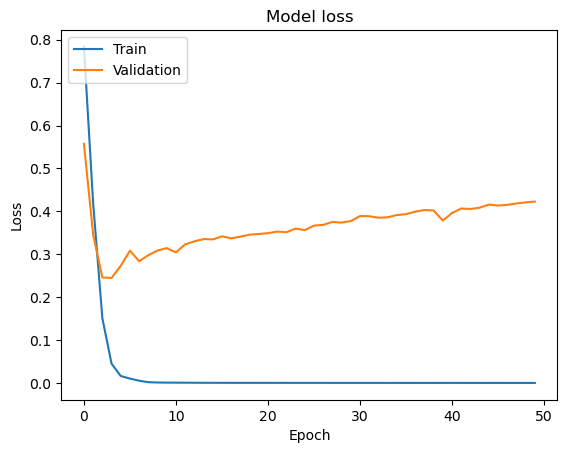

In [401]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### from the graph above, The model seems to overfit . The valutaion loss keeps increasing after a point.

In [402]:
# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8908 - loss: 0.5937
Test Loss: 0.5516732335090637, Test Accuracy: 0.9030836820602417


In [418]:
from keras.callbacks import EarlyStopping
start_time = time.time()
stopper = EarlyStopping(patience = 4)
epochs = 50
history = cnn_model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks = stopper)
end_time = time.time()
time_cnn_early = (end_time - start_time)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6179 - loss: 0.8887 - val_accuracy: 0.7876 - val_loss: 0.5435
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8059 - loss: 0.4434 - val_accuracy: 0.8540 - val_loss: 0.4091
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9240 - loss: 0.2277 - val_accuracy: 0.8982 - val_loss: 0.3415
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9823 - loss: 0.0702 - val_accuracy: 0.8982 - val_loss: 0.2615
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9974 - loss: 0.0254 - val_accuracy: 0.9159 - val_loss: 0.2794
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9983 - loss: 0.0085 - val_accuracy: 0.9204 - val_loss: 0.3092
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9993 - loss: 0.0058 - val_accuracy: 0.9292 - val_loss: 0.3141
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9204 - v

In [419]:
# Evaluate the model on the test data
test_loss_early, test_accuracy_early = cnn_model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9153 - loss: 0.4667
Test Loss: 0.5516732335090637, Test Accuracy: 0.9030836820602417


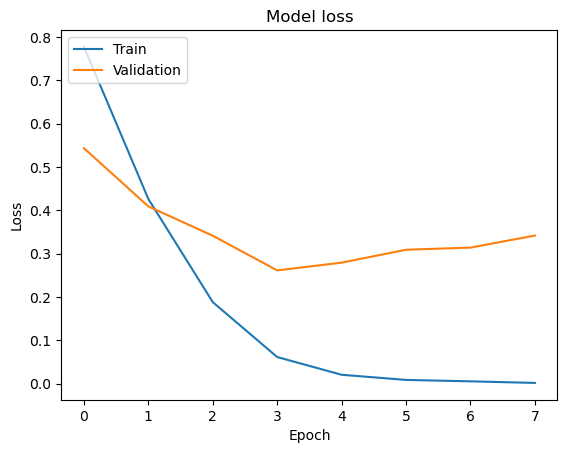

In [420]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### The model with Early stopping seems better. The fit stopped at the eighth epoc

In [421]:
res_dict = {'model': ['LR-Stemmed-Count', 'LR-Stemmed-TFID', 'LR-Lemmatized-Count', 'LR-Lemmatized-TFID', 'DT-Stemmed-Count', 'DT-Stemmed-TFID', 
                      'DT-Lemmatized-Count', 'DT-Lemmatized-TFID', 'Bayes-Stemmed-Count', 'Bayes-Stemmed-TFID', 'Bayes-Lemmatized-Count', 'Bayes-Lemmatized-TFID', 'CNN', 'CNN-EarlyStopping'],
           'best_params': [lgr_count_stem_grid_param, lgr_stem_tfidf_grid_param, lgr_count_param, lgr_tfidf_param, dt_stem_count_grid_param, dt_stem_tfidf_grid_param, dt_count_param, dt_tfidf_param, 
                           bay_stem_count_grid_param, bay_tfidf_stem_grid_param, bay_count_grid_param, bay_tfidf_grid_param, ' ', ' '],
           'best_score': [lgr_count_stem_grid_acc, lgr_stem_tfidf_grid_acc, lgr_count_grid_acc, lgr_tfidf_grid_acc, dt_stem_count_grid_acc, dt_stem_tfidf_grid_acc, dt_count_grid_acc, bay_stem_count_grid_acc, dt_tfidf_grid_acc,
                          bay_tfidf_stem_grid_acc, bay_count_grid_acc, bay_tfidf_grid_acc, test_accuracy, test_accuracy_early],
           'fit time': [time_lgr_count_stem, time_lgr_stem_tfidf, time_lgr_count, time_lgr_tfidf, time_dt_count_stem, time_dt_tfidf_stem, time_dt_count, time_dt_tfidf, 
                        time_bay_count_stem, time_bay_tfidf_stem,time_bay_count,time_bay_tfidf, time_cnn, time_cnn_early]}
results_df = pd.DataFrame(res_dict).set_index('model')

In [422]:
results_df

best_params  best_score    fit time
model                                                     
LR-Stemmed-Count              2000    0.902827   14.807137
LR-Stemmed-TFID                500    0.872792   19.473354
LR-Lemmatized-Count           2000    0.883392   11.932962
LR-Lemmatized-TFID             500    0.856890   10.602309
DT-Stemmed-Count              1000    0.840989   23.583094
DT-Stemmed-TFID               2000    0.839223   48.821333
DT-Lemmatized-Count           2000    0.835689   16.191636
DT-Lemmatized-TFID            2000    0.840989   19.623062
Bayes-Stemmed-Count           1000    0.835689    6.000319
Bayes-Stemmed-TFID             500    0.825088    6.083068
Bayes-Lemmatized-Count        2000    0.825088    3.548097
Bayes-Lemmatized-TFID          500    0.810954    5.599316
CNN                                   0.903084  177.485670
CNN-EarlyStopping                     0.916300   18.124731

### From the above comparision, the logistic regression model with stemmed content and count vectorizer and the CNN model with early stopping performs better than other models